    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  CERCEVELIK  
1       0.7487  CERCEV

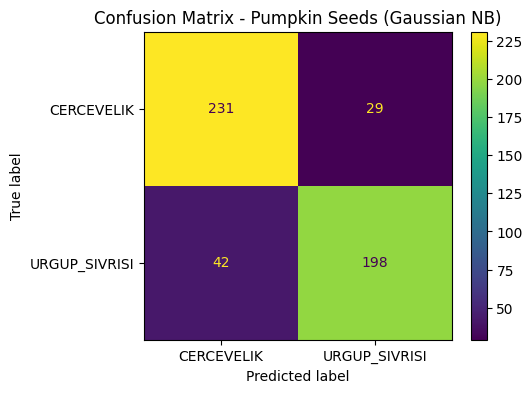

In [ ]:
# ------------------------------------------------------------
# Лаба №7 : Наивный Байес на датасете "Pumpkin Seeds"
# ------------------------------------------------------------
# 1. Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/Pumpkin_Seeds_Dataset.csv"
df = pd.read_csv(url)

# 3. Смотрим, что внутри
print(df.head())
print(df['Class'].value_counts())

# 4. Разделяем признаки и целевой столбец
X = df.drop('Class', axis=1)
y = df['Class']

# 5. Делим на обучающую и тестовую выборки (80 / 20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Масштабируем признаки (желательно для моделей, использующих нормальное распределение)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 7. Обучаем Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# 8. Делаем предсказания
y_pred = gnb.predict(X_test_scaled)

# 9. Оцениваем качество
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n=== Classification report ===")
print(classification_report(y_test, y_pred))

# 10. Строим и выводим матрицу ошибок (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gnb.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("Confusion Matrix - Pumpkin Seeds (Gaussian NB)")
plt.show()
